In [194]:
import pandas as pd      
import numpy as np        
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from geopy.distance import great_circle
import math

# VARIABLE IDENTIFICATION


In [97]:
# read the dataset
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [98]:
type(data)

pandas.core.frame.DataFrame

In [99]:
# to view the data, we can use the head command
# head(n = "enter the number of rows to want to view from top")

data.head(50)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [100]:
# to check the dimension of the data set, we can use the shape 
data.shape

(729322, 11)

In [101]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [102]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [103]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)

In [104]:
data.dropoff_datetime=pd.to_datetime(data.dropoff_datetime)

In [105]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [107]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [108]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2


In [109]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [116]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [117]:

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [119]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [120]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


# UNIVARIATE ANALYSIS

<Axes: xlabel='trip_duration', ylabel='Count'>

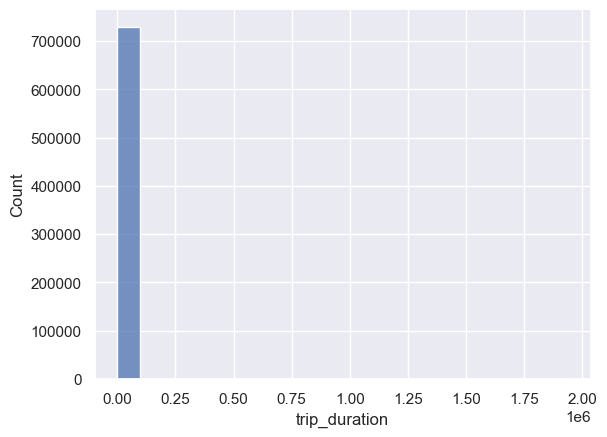

In [121]:
sns.histplot(data['trip_duration'],kde=False,bins=20)


<Axes: >

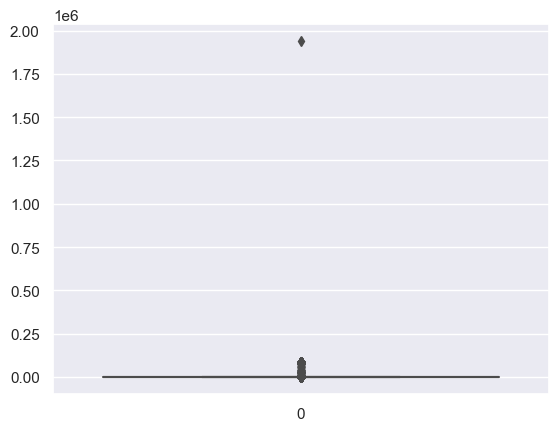

In [123]:
sns.boxplot(data['trip_duration'])

In [124]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

<Axes: xlabel='vendor_id', ylabel='count'>

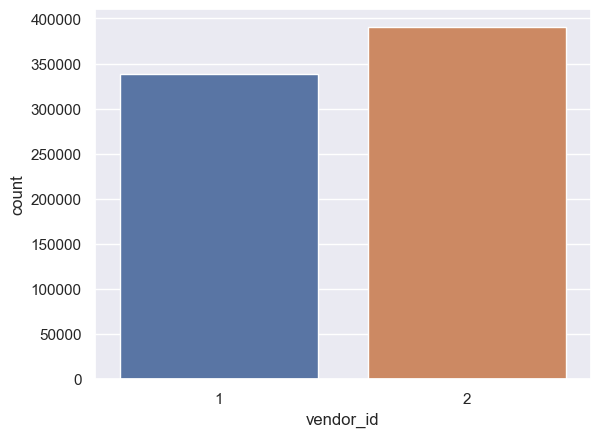

In [125]:
sns.countplot(x='vendor_id',data=data)

In [126]:
data.passenger_count.value_counts()


passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

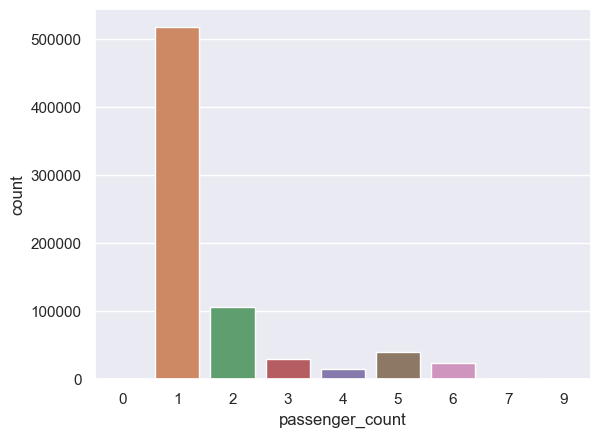

In [127]:
sns.countplot(x='passenger_count',data=data)


In [128]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [129]:
data['store_and_fwd_flag'].value_counts(normalize=True)


store_and_fwd_flag
N    0.994463
Y    0.005537
Name: proportion, dtype: float64

In [130]:
data['distance'].value_counts()


distance
0.000000    2893
0.000424      25
0.000424      18
0.000424      18
0.001273      10
            ... 
0.925223       1
4.112012       1
1.107789       1
2.688127       1
5.945846       1
Name: count, Length: 726220, dtype: int64

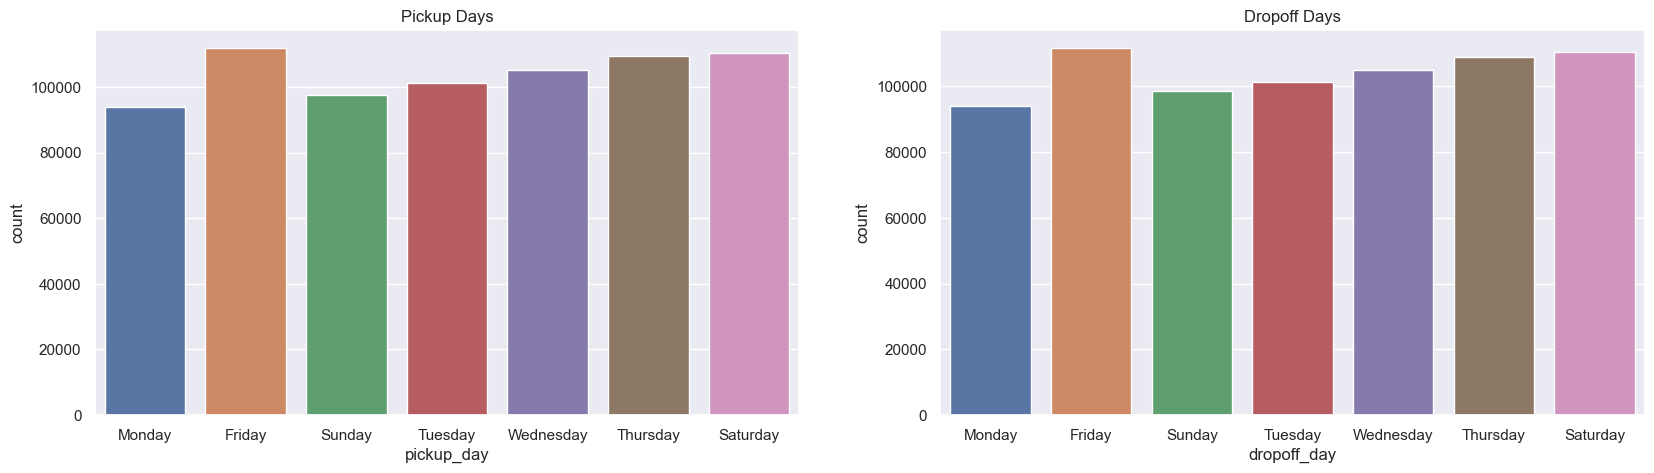

In [131]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

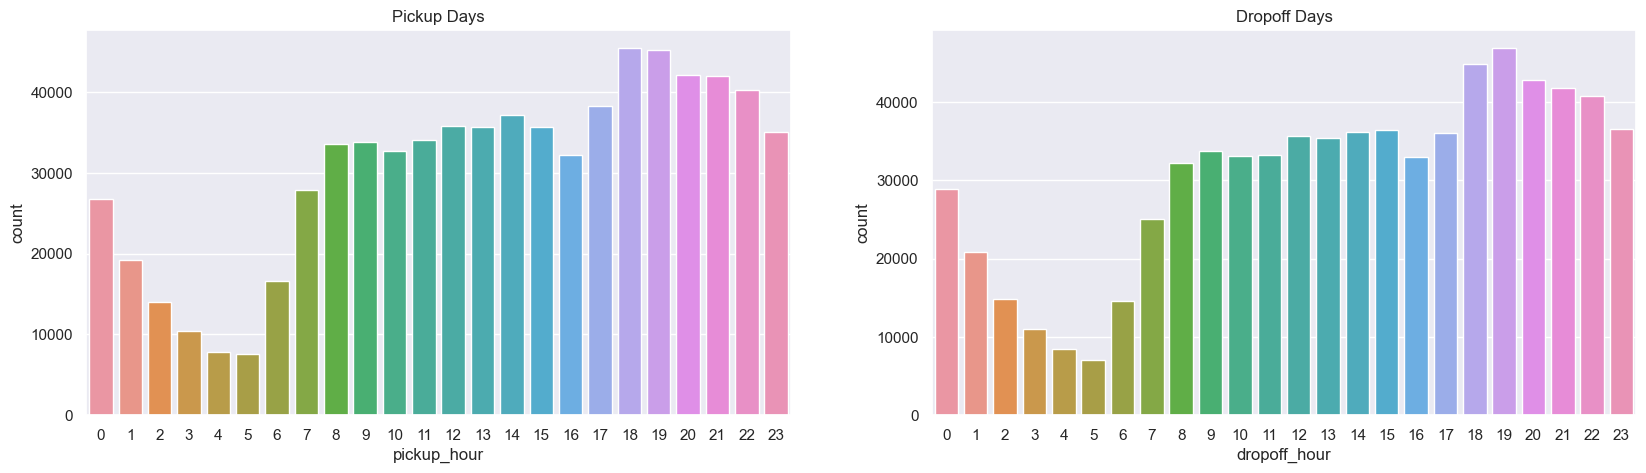

In [132]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

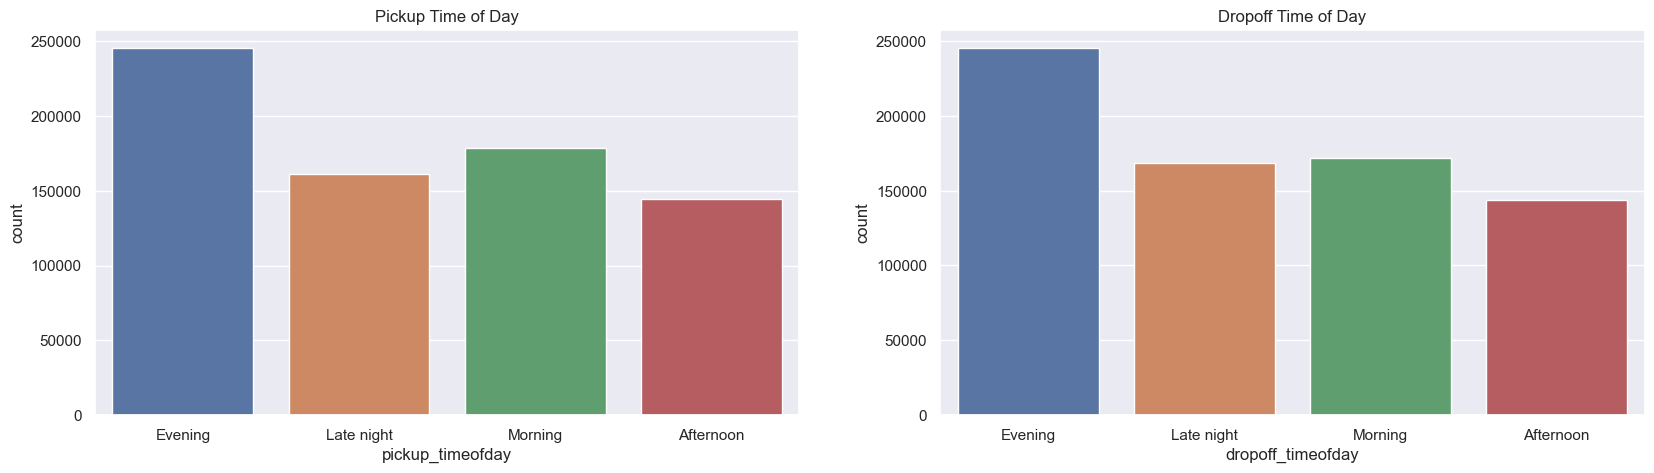

In [133]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)


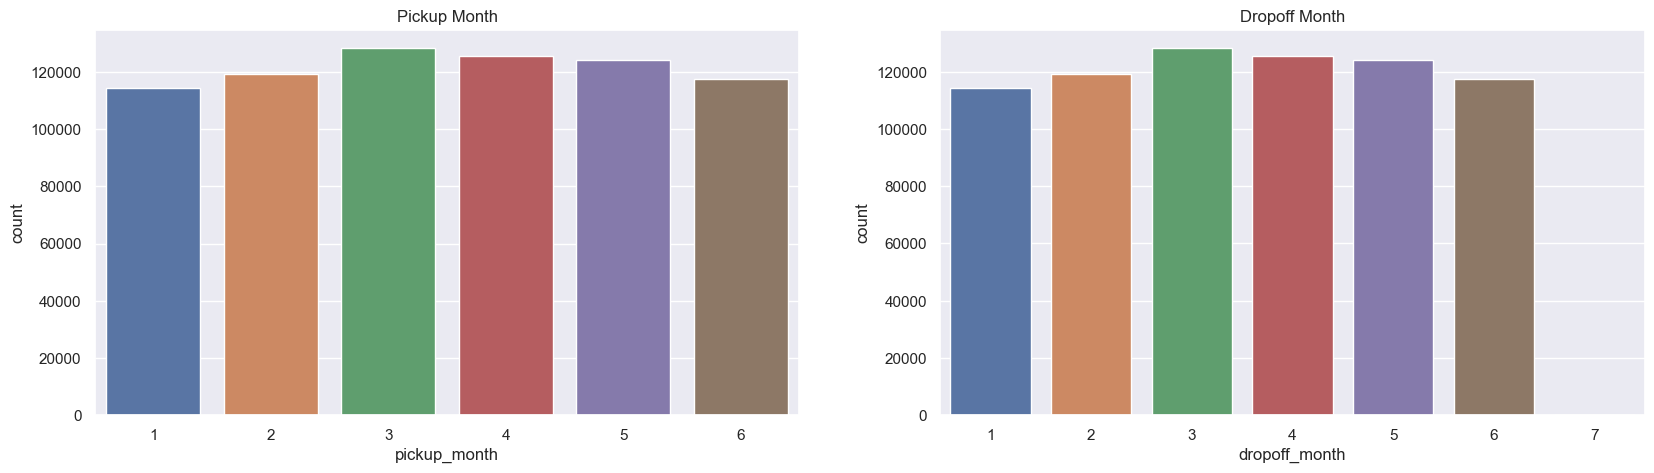

In [134]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

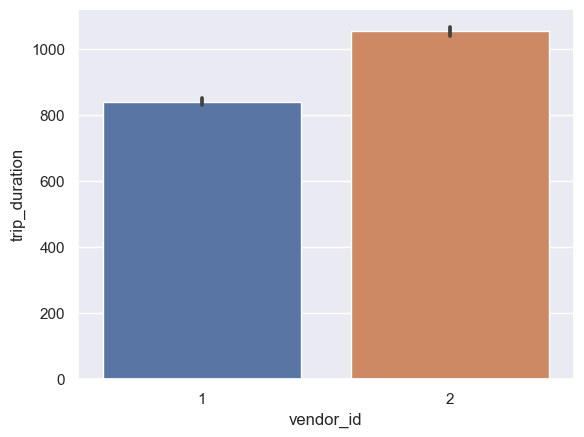

In [135]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


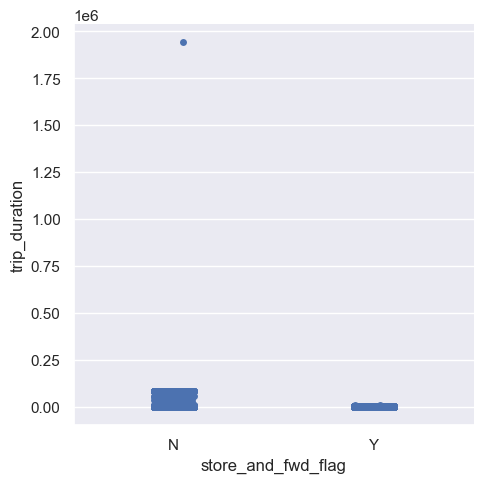

In [137]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


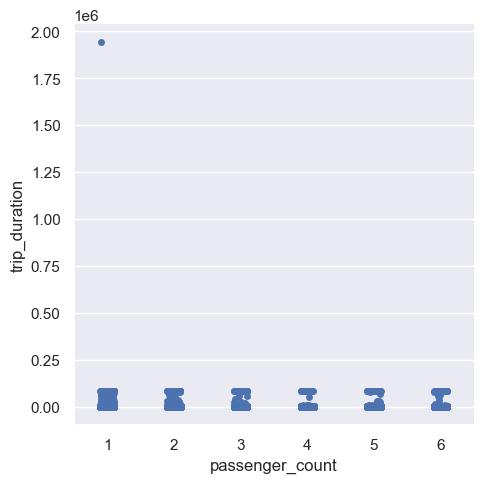

In [138]:
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")


<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

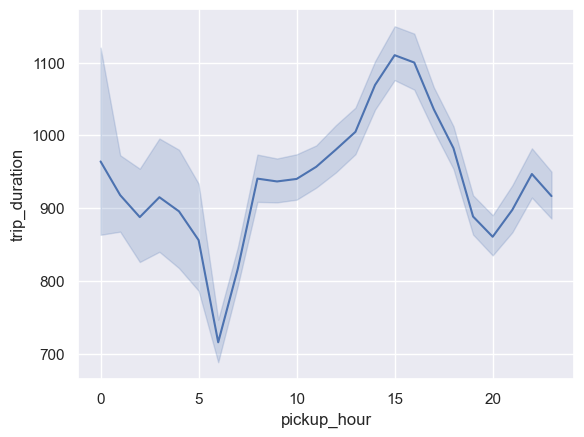

In [139]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

<Axes: xlabel='pickup_timeofday', ylabel='trip_duration'>

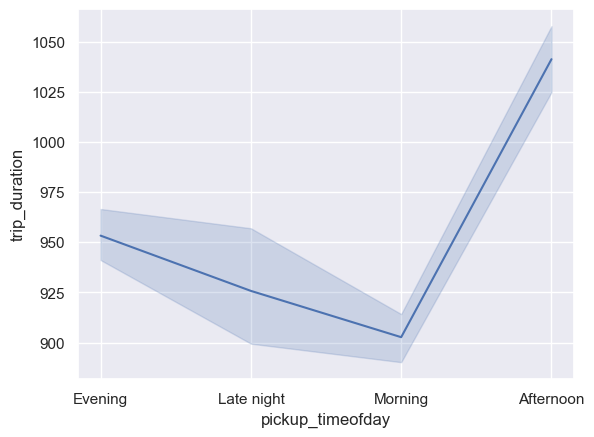

In [140]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)


<Axes: xlabel='pickup_day_no', ylabel='trip_duration'>

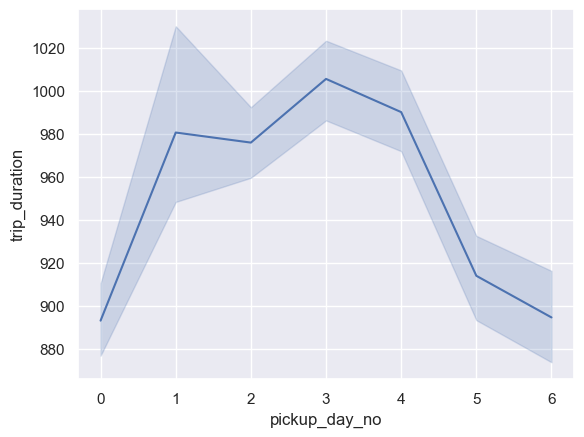

In [141]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)


<Axes: xlabel='pickup_month', ylabel='trip_duration'>

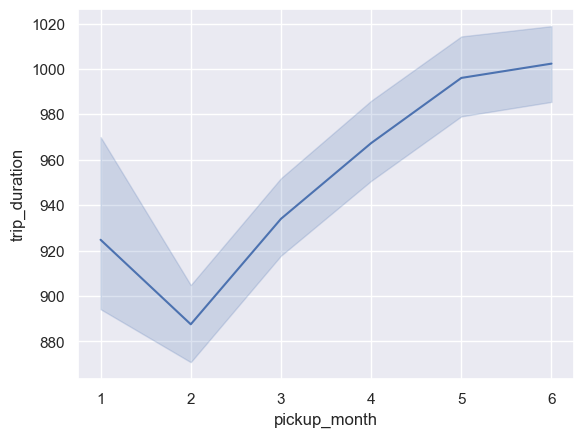

In [142]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data)


---

<Axes: xlabel='vendor_id', ylabel='distance'>

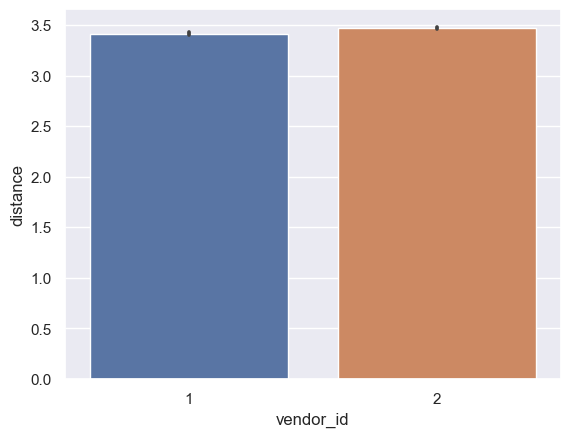

In [143]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


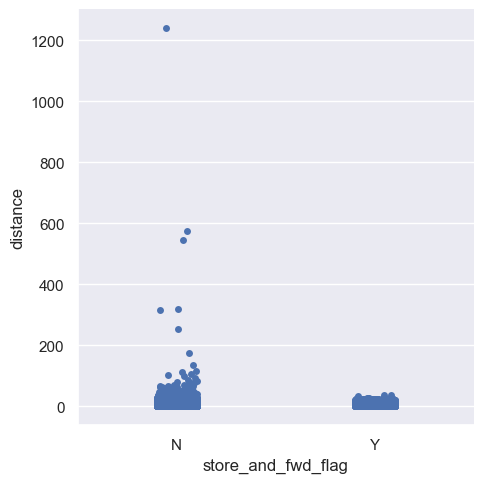

In [144]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


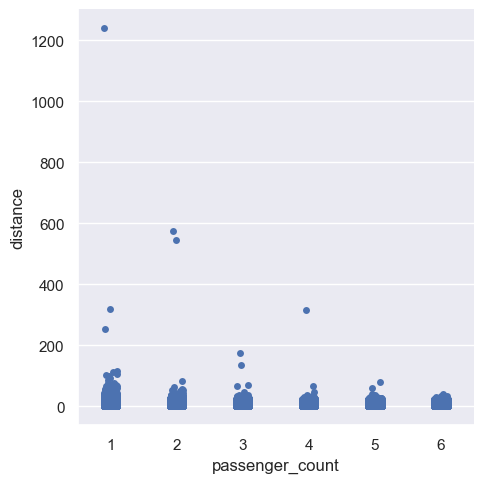

In [145]:
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")


<Axes: xlabel='pickup_day_no', ylabel='distance'>

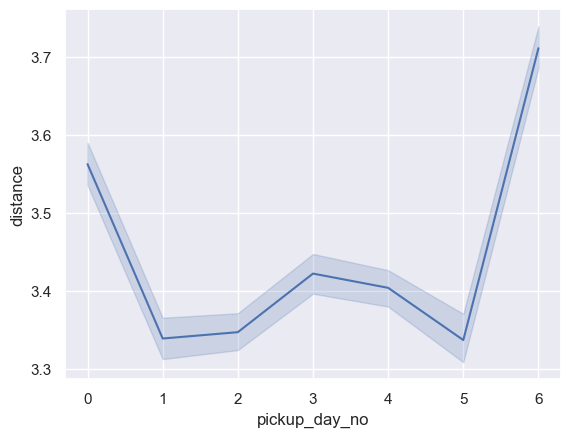

In [146]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)


<Axes: xlabel='pickup_hour', ylabel='distance'>

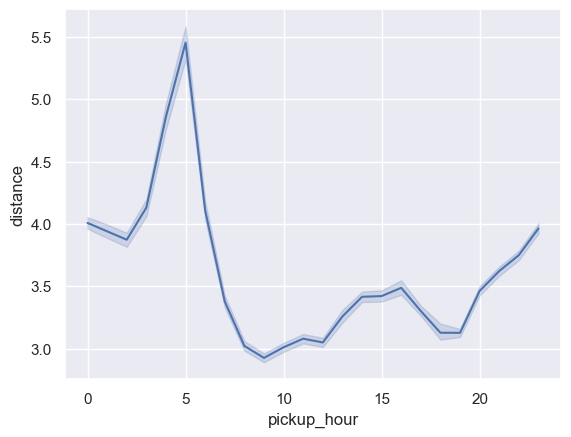

In [147]:
sns.lineplot(x='pickup_hour',y='distance',data=data)


<Axes: xlabel='pickup_month', ylabel='distance'>

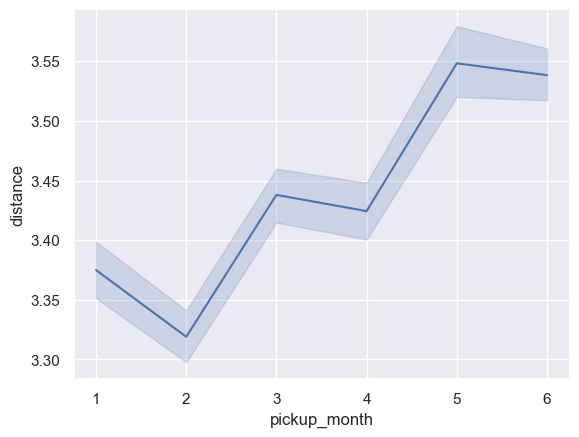

In [148]:
sns.lineplot(x='pickup_month',y='distance',data=data)


<Axes: xlabel='vendor_id', ylabel='passenger_count'>

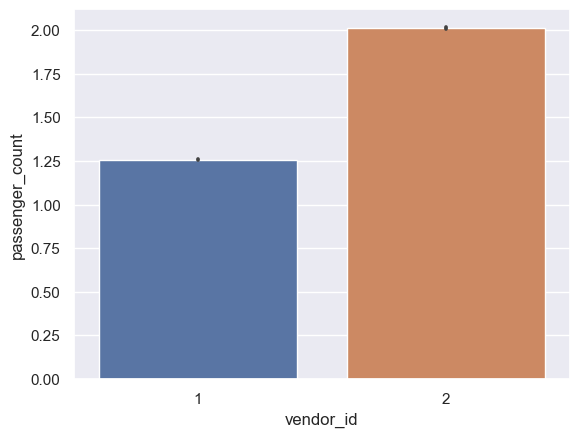

In [149]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


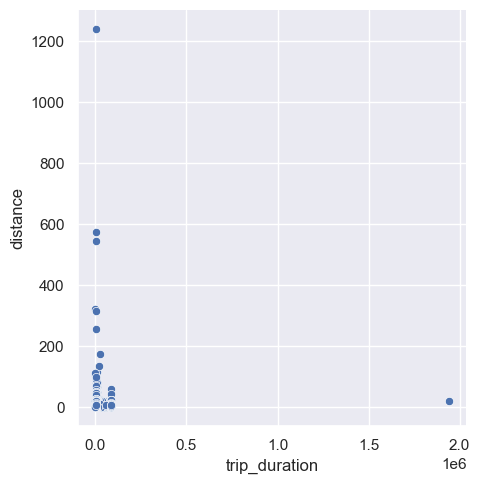

In [150]:
sns.relplot(y=data.distance,x='trip_duration',data=data)


# MODEL BUILDING 
# ASSIGNMENT TWO STARTS HERE

In [155]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


In [157]:
#The value of largest 5 trip duration values are as follows 
data['trip_duration'].nlargest(5)


21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64

In [158]:
#The the number of rows with 1 as their trip duration values 
len(data[data['trip_duration']==1 ])

12

In [163]:
data=data[data.trip_duration!=data.trip_duration.max()]


In [165]:
data=data[data.trip_duration!=data.trip_duration.min()]

In [166]:
data['trip_duration'].nlargest(5)

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64

In [167]:
len(data[data['trip_duration']==1 ])

0

In [169]:
# trip_duration in hours
data['trip_duration_hour']=data['trip_duration']/3600 

In [173]:
data['log_distance']=np.log(data.distance)


/Users/hafsasaidali/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [174]:
data['log_trip_duration']=np.log(data.trip_duration_hour)


In [175]:
mean_dist=data['distance'].mean()
data.loc[data['distance']==0,'distance']=mean_dist

In [176]:
data['speed']=data['distance']/data['trip_duration_hour']


In [177]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,trip_duration_hour,log_distance,log_trip_duration,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16,2,2,Evening,Evening,1.199074,0.111111,0.181550,-2.197225,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23,3,3,Late night,Late night,4.129117,0.305556,1.418064,-1.185624,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,18,2,2,Evening,Evening,7.250763,0.454167,1.981107,-0.789291,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,10,1,1,Morning,Morning,2.361101,0.316944,0.859128,-1.149029,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,6,2,2,Morning,Morning,4.328540,0.235556,1.465230,-1.445808,18.375877


In [171]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'trip_duration_hour'],
      dtype='object')

In [185]:
## drop all un necessary columns and create new data frame

model_data=data.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timeofday','dropoff_timeofday','speed','log_distance','distance']]



In [186]:
model_data.head()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,speed,log_distance,distance
0,1,N,400,Monday,Monday,2,2,Evening,Evening,10.791669,0.181550,1.199074
1,2,N,1100,Friday,Friday,3,3,Late night,Late night,13.513473,1.418064,4.129117
2,2,N,1635,Sunday,Sunday,2,2,Evening,Evening,15.964983,1.981107,7.250763
3,6,N,1141,Tuesday,Tuesday,1,1,Morning,Morning,7.449573,0.859128,2.361101
4,1,N,848,Wednesday,Wednesday,2,2,Morning,Morning,18.375877,1.465230,4.328540


In [187]:
model_data=pd.get_dummies(model_data,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timeofday', 'dropoff_timeofday'], dtype=int)

In [202]:
model_data.head()

,passenger_count,trip_duration,speed,log_distance,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,...,dropoff_month_6,dropoff_month_7,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,dropoff_timeofday_Afternoon,dropoff_timeofday_Evening,dropoff_timeofday_Late night,dropoff_timeofday_Morning
0,1,400,10.791669,0.181550,1.199074,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,2,1100,13.513473,1.418064,4.129117,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,1635,15.964983,1.981107,7.250763,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,6,1141,7.449573,0.859128,2.361101,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,848,18.375877,1.465230,4.328540,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [203]:
model_data.columns

Index(['passenger_count', 'trip_duration', 'speed', 'log_distance', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_day_Friday',
       'pickup_day_Monday', 'pickup_day_Saturday', 'pickup_day_Sunday',
       'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday',
       'dropoff_day_Friday', 'dropoff_day_Monday', 'dropoff_day_Saturday',
       'dropoff_day_Sunday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday',
       'dropoff_day_Wednesday', 'pickup_month_1', 'pickup_month_2',
       'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6',
       'dropoff_month_1', 'dropoff_month_2', 'dropoff_month_3',
       'dropoff_month_4', 'dropoff_month_5', 'dropoff_month_6',
       'dropoff_month_7', 'pickup_timeofday_Afternoon',
       'pickup_timeofday_Evening', 'pickup_timeofday_Late night',
       'pickup_timeofday_Morning', 'dropoff_timeofday_Afternoon',
       'dropoff_timeofday_Evening', 'dropoff_timeofday_Late night',
       'dropof

# the correlation between Features

In [211]:
base_line_col=['distance']
# predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
#                'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
#                'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
#                'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
#                'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
#                'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timeofday_late night',
#                'pickup_timeofday_midday','pickup_timeofday_morning','dropoff_timeofday_evening',
#                'dropoff_timeofday_late night','dropoff_timeofday_midday','dropoff_timeofday_morning']

predictor_cols=['passenger_count', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_day_Friday',
       'pickup_day_Monday', 'pickup_day_Saturday', 'pickup_day_Sunday',
       'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday',
       'dropoff_day_Friday', 'dropoff_day_Monday', 'dropoff_day_Saturday',
       'dropoff_day_Sunday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday',
       'dropoff_day_Wednesday', 'pickup_month_1', 'pickup_month_2',
       'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6',
       'dropoff_month_1', 'dropoff_month_2', 'dropoff_month_3',
       'dropoff_month_4', 'dropoff_month_5', 'dropoff_month_6',
       'dropoff_month_7', 'pickup_timeofday_Afternoon',
       'pickup_timeofday_Evening', 'pickup_timeofday_Late night',
       'pickup_timeofday_Morning', 'dropoff_timeofday_Afternoon',
       'dropoff_timeofday_Evening', 'dropoff_timeofday_Late night',
       'dropoff_timeofday_Morning']
target_col=['trip_duration']

In [212]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    train_pred=estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    
    
    return test_pred


In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(model_data,test_size=validation_size, random_state=seed)

In [214]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
math.sqrt(mae(X_test[target_col],mean_pred))

3162.518751519496

In [221]:
alg1 = LinearRegression()
print('The baseline model')
y_pred1=modelfit(alg1, X_train, X_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 3082
CV Score : Mean - 3079 | Std - 185.6 | Min - 2703 | Max - 3498
RMSE on Test Data: 3127
The coeffient is [[110.35005099]]



Model Report
RMSE on Train Data: 3060
CV Score : Mean - 3063 | Std - 185.7 | Min - 2698 | Max - 3475
RMSE on Test Data: 3116


<Axes: title={'center': 'Model Coefficients'}>

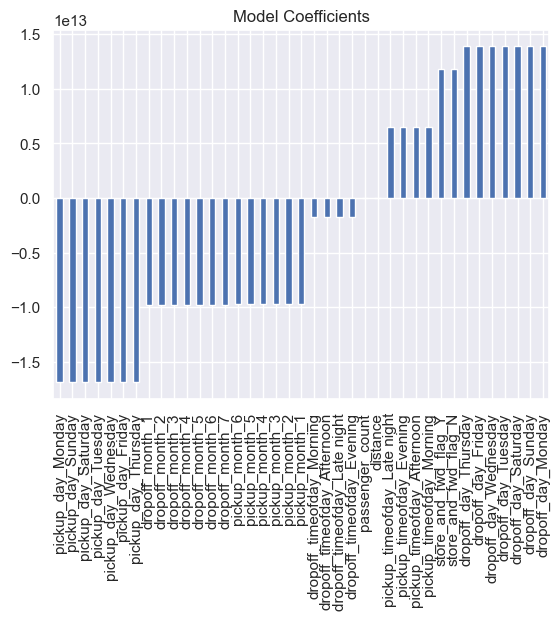

In [222]:
alg2 = LinearRegression()
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')